In [19]:
import pandas as pd

import matplotlib.pyplot as plt

my_df = pd.read_excel("23-24.ods", sheet_name="Journal",header=4, index_col=3,
             parse_dates=True)

# isolate km column, and remove NaN
km_df = my_df["km"]
km_df.dropna(inplace=True)

# reindex day by day
new_idx = pd.date_range(start=km_df.index[0], end=km_df.index[-1], freq='D')
km_reindexed=km_df.reindex(new_idx)


      

In [20]:
# Reindex by week num
km_w = km_reindexed.copy()
km_w.index = pd.to_datetime(km_w.index, format = '%Y-%m-%d').strftime('%W')
# km_w.index
var = km_w.groupby(by=km_w.index).sum()
print(type(var))

<class 'pandas.core.series.Series'>


<BarContainer object of 124 artists>

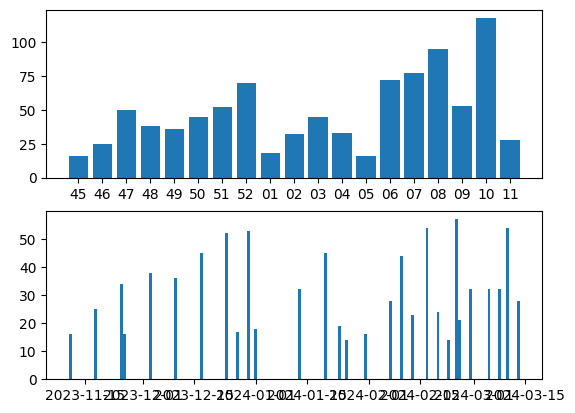

In [29]:
# print(km_df.index)
km_w = km_df.to_frame()
km_w["w_num"] = km_w.index.strftime("%W")
# print(km_w)
km_w_sum = km_w.groupby(by=km_w["w_num"], sort=False).agg("sum")
# print(km_w_sum)
# km_w_sum["mean"] = km_w.groupby(by=km_w["w_num"], sort=False).agg("mean")
# km_w_sum.plot.bar()



fig, ax = plt.subplots(2)
type(ax)
# type(ax)
ax[0].bar(km_w_sum.index, km_w_sum.km)
ax[1].bar(km_reindexed.index, km_reindexed)